In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

import re
import string
import urllib.request
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [2]:
pd.set_option('max_colwidth',80)

In [3]:
nrows = 4700

In [4]:
def load_tmdb_movies(path, nrows):
    df = pd.read_csv(path, nrows=nrows)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path, nrows):
    df = pd.read_csv(path, nrows=nrows)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


In [5]:
df_movies = load_tmdb_movies("./tmdb-movie-metadata/tmdb_5000_movies.csv", nrows)

In [6]:
df_credits = load_tmdb_credits("./tmdb-movie-metadata/tmdb_5000_credits.csv", nrows)

In [7]:
df_movies.columns.values

array(['budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'vote_average', 'vote_count'], dtype=object)

In [8]:
df_credits.columns.values

array(['movie_id', 'title', 'cast', 'crew'], dtype=object)

In [9]:
df_movies.iloc[0].keywords

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [10]:
df_movies.keywords

0       [{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id...
1       [{'id': 270, 'name': 'ocean'}, {'id': 726, 'name': 'drug abuse'}, {'id': 911...
2       [{'id': 470, 'name': 'spy'}, {'id': 818, 'name': 'based on novel'}, {'id': 4...
3       [{'id': 849, 'name': 'dc comics'}, {'id': 853, 'name': 'crime fighter'}, {'i...
4       [{'id': 818, 'name': 'based on novel'}, {'id': 839, 'name': 'mars'}, {'id': ...
                                             ...                                       
4695    [{'id': 1155, 'name': 'brother sister relationship'}, {'id': 6069, 'name': '...
4696    [{'id': 237, 'name': 'gay'}, {'id': 1025, 'name': 'great britain'}, {'id': 2...
4697      [{'id': 10183, 'name': 'independent film'}, {'id': 10768, 'name': 'lesbian'}]
4698                                         [{'id': 187056, 'name': 'woman director'}]
4699                                                                                 []
Name: keywords, Length: 4700, dt

The keyords may conten inmportant information. E.g., "sequel" may be an interesting keyword. (Avengers, ToyStory)

In [11]:
df_movies.genres

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, '...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, ...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, '...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, ...
                                             ...                                       
4695    [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'n...
4696                    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
4697                   [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
4698                                                [{'id': 99, 'name': 'Documentary'}]
4699                                                      [{'id': 18, 'name': 'Drama'}]
Name: genres, Length: 4700, dtyp

In [12]:
df_movies.release_date

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4695    1997-08-01
4696    2011-09-22
4697    1986-08-08
4698    2014-03-10
4699    2015-06-05
Name: release_date, Length: 4700, dtype: object

The release date contains information about the season. Key moments: summer.

In [13]:
df_movies.overview

0       In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora o...
1       Captain Barbossa, long believed to be dead, has come back to life and is hea...
2       A cryptic message from Bond’s past sends him on a trail to uncover a siniste...
3       Following the death of District Attorney Harvey Dent, Batman assumes respons...
4       John Carter is a war-weary, former military captain who's inexplicably trans...
                                             ...                                       
4695    Zohre's shoes are gone; her older brother Ali lost them. They are poor, ther...
4696    After a drunken house party with his straight mates, Russell heads out to a ...
4697    The story of Nola Darling's simultaneous sexual relationships with three dif...
4698    Abbie came of age in honky tonks, defying her life threatening disease, but ...
4699    Larisa is 16 and lives in a city by the sea. It's a small city, where gossip...
Name: overview, Length: 4700, dt

In [14]:
df_movies.spoken_languages

0       [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Españo...
1                                              [{'iso_639_1': 'en', 'name': 'English'}]
2       [{'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'en', 'name': 'Engli...
3                                              [{'iso_639_1': 'en', 'name': 'English'}]
4                                              [{'iso_639_1': 'en', 'name': 'English'}]
                                             ...                                       
4695                                             [{'iso_639_1': 'fa', 'name': 'فارسی'}]
4696                                           [{'iso_639_1': 'en', 'name': 'English'}]
4697                                           [{'iso_639_1': 'en', 'name': 'English'}]
4698                                           [{'iso_639_1': 'en', 'name': 'English'}]
4699                                            [{'iso_639_1': 'ro', 'name': 'Română'}]
Name: spoken_languages, Length: 

In [15]:
df_movies.columns.values

array(['budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'vote_average', 'vote_count'], dtype=object)

In [16]:
df_movies.production_companies

0       [{'name': 'Ingenious Film Partners', 'id': 289}, {'name': 'Twentieth Century...
1       [{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Jerry Bruckheimer Film...
2       [{'name': 'Columbia Pictures', 'id': 5}, {'name': 'Danjaq', 'id': 10761}, {'...
3       [{'name': 'Legendary Pictures', 'id': 923}, {'name': 'Warner Bros.', 'id': 6...
4                                           [{'name': 'Walt Disney Pictures', 'id': 2}]
                                             ...                                       
4695    [{'name': 'The Institute for the Intellectual Development of Children & Youn...
4696    [{'name': 'EM Media', 'id': 1917}, {'name': 'The Bureau', 'id': 10441}, {'na...
4697                              [{'name': '40 Acres & A Mule Filmworks', 'id': 4319}]
4698                                                                                 []
4699                                                                                 []
Name: production_companies, Leng

In [17]:
df = df_movies[["id", "title", "popularity", "vote_average", "vote_count", "runtime", "release_date"]]

In [18]:
df[df.title == "Avatar"]

,id,title,popularity,vote_average,vote_count,runtime,release_date
0,19995,Avatar,150.437577,7.2,11800,162.0,2009-12-10


In [19]:
def info_json_object_to_list(json_in, atribute):
    aux = []
    for row in json_in:
        aux.append(row[atribute])
    return aux

get_namelist = lambda x: info_json_object_to_list(x, "name")


In [20]:
def crew_json_object_to_list(json_in, atribute):
    aux = []
    for e in json_in:
        e = dict(e)
        for key, value in e.items():
            if key=="job":
                if value == atribute:
                    aux.append(e["name"])
    return aux

get_director = lambda x: crew_json_object_to_list(x, "Director")
get_producer = lambda x: crew_json_object_to_list(x, "Producer")
get_screenplay = lambda x: crew_json_object_to_list(x, "Screenplay")
get_writer   = lambda x: crew_json_object_to_list(x, "Writer")


In [21]:
print("Director\n", df_credits.crew.apply(get_director))
print("Producer\n", df_credits.crew.apply(get_producer))
print("Screenplay\n", df_credits.crew.apply(get_screenplay))
print("Writer\n", df_credits.crew.apply(get_writer))

Director
 0                   [James Cameron]
1                  [Gore Verbinski]
2                      [Sam Mendes]
3               [Christopher Nolan]
4                  [Andrew Stanton]
                   ...             
4695                 [Majid Majidi]
4696                 [Andrew Haigh]
4697                    [Spike Lee]
4698                    [Cary Bell]
4699    [Nicolae Constantin Tanase]
Name: crew, Length: 4700, dtype: object
Producer
 0                                                 [James Cameron, Jon Landau]
1       [Jerry Bruckheimer, Eric McLeod, Chad Oman, Peter Kohn, Pat Sandston]
2                                       [Barbara Broccoli, Michael G. Wilson]
3                             [Charles Roven, Christopher Nolan, Emma Thomas]
4                                 [Colin Wilson, Jim Morris, Lindsey Collins]
                                        ...                                  
4695                                                                       [

In [22]:
df_movies.genres.apply(get_namelist)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4695                          [Drama, Comedy, Family]
4696                                 [Drama, Romance]
4697                                [Comedy, Romance]
4698                                    [Documentary]
4699                                          [Drama]
Name: genres, Length: 4700, dtype: object

In [23]:
df

,id,title,popularity,vote_average,vote_count,runtime,release_date
0,19995,Avatar,150.437577,7.2,11800,162.0,2009-12-10
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,169.0,2007-05-19
2,206647,Spectre,107.376788,6.3,4466,148.0,2015-10-26
3,49026,The Dark Knight Rises,112.312950,7.6,9106,165.0,2012-07-16
4,49529,John Carter,43.926995,6.1,2124,132.0,2012-03-07
...,...,...,...,...,...,...,...
4695,21334,Children of Heaven,7.072118,7.8,112,89.0,1997-08-01
4696,79120,Weekend,1.041254,7.4,163,96.0,2011-09-22
4697,27995,She's Gotta Have It,6.722213,6.1,25,84.0,1986-08-08
4698,253290,Butterfly Girl,0.015189,0.0,0,77.0,2014-03-10


In [24]:
df["genres"] = df_movies.genres.apply(get_namelist)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a368553...","[{'credit_id': '52fe48009251416c750aca23', 'department': 'Editing', 'gender'..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4232c...","[{'credit_id': '52fe4232c3a36847f800b579', 'department': 'Camera', 'gender':..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'credit_id': '52fe4d22c3a368484e1...","[{'credit_id': '54805967c3a36829b5002c41', 'department': 'Sound', 'gender': ..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '52fe4781c...","[{'credit_id': '52fe4781c3a36847f81398c3', 'department': 'Sound', 'gender': ..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'credit_id': '52fe479ac3a36847f8...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'department': 'Writing', 'gender'..."
...,...,...,...,...
4695,21334,Children of Heaven,"[{'cast_id': 1, 'character': 'Ali's Father', 'credit_id': '52fe4414c3a368484...","[{'credit_id': '52fe4414c3a368484e00e4b5', 'department': 'Directing', 'gende..."
4696,79120,Weekend,"[{'cast_id': 1000, 'character': 'Russell', 'credit_id': '52fe49c2c3a368484e1...","[{'credit_id': '52fe49c2c3a368484e13e4e1', 'department': 'Directing', 'gende..."
4697,27995,She's Gotta Have It,"[{'cast_id': 3, 'character': 'Nola Darling', 'credit_id': '52fe4572c3a368484...","[{'credit_id': '584a62c292514119bc01c8b0', 'department': 'Art', 'gender': 0,..."
4698,253290,Butterfly Girl,[],"[{'credit_id': '5305c66dc3a3685a711726c1', 'department': 'Production', 'gend..."


In [26]:
df

,id,title,popularity,vote_average,vote_count,runtime,release_date,genres
0,19995,Avatar,150.437577,7.2,11800,162.0,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]"
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,169.0,2007-05-19,"[Adventure, Fantasy, Action]"
2,206647,Spectre,107.376788,6.3,4466,148.0,2015-10-26,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,112.312950,7.6,9106,165.0,2012-07-16,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,43.926995,6.1,2124,132.0,2012-03-07,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...
4695,21334,Children of Heaven,7.072118,7.8,112,89.0,1997-08-01,"[Drama, Comedy, Family]"
4696,79120,Weekend,1.041254,7.4,163,96.0,2011-09-22,"[Drama, Romance]"
4697,27995,She's Gotta Have It,6.722213,6.1,25,84.0,1986-08-08,"[Comedy, Romance]"
4698,253290,Butterfly Girl,0.015189,0.0,0,77.0,2014-03-10,[Documentary]


In [27]:
df["keywords"] = df_movies.keywords.apply(get_namelist)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
print("Director\n", )
print("Producer\n", df_credits.crew.apply(get_producer))
print("Screenplay\n", df_credits.crew.apply(get_screenplay))
print("Writer\n", df_credits.crew.apply(get_writer))

Director

Producer
 0                                                 [James Cameron, Jon Landau]
1       [Jerry Bruckheimer, Eric McLeod, Chad Oman, Peter Kohn, Pat Sandston]
2                                       [Barbara Broccoli, Michael G. Wilson]
3                             [Charles Roven, Christopher Nolan, Emma Thomas]
4                                 [Colin Wilson, Jim Morris, Lindsey Collins]
                                        ...                                  
4695                                                                       []
4696                                                                       []
4697                                                              [Spike Lee]
4698                              [Jessica Miller, Cary Bell, Susan Grossman]
4699                                             [Tudor Giurgiu, Radu Stancu]
Name: crew, Length: 4700, dtype: object
Screenplay
 0                                               [James Cameron]
1     

In [29]:
df["director"]   = df_credits.crew.apply(get_director)
df["producer"]   = df_credits.crew.apply(get_producer)
df["screenplay"] = df_credits.crew.apply(get_screenplay)
df["writer"]     = df_credits.crew.apply(get_writer)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [30]:
df

,id,title,popularity,vote_average,vote_count,runtime,release_date,genres,keywords,director,producer,screenplay,writer
0,19995,Avatar,150.437577,7.2,11800,162.0,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futu...",[James Cameron],"[James Cameron, Jon Landau]",[James Cameron],[James Cameron]
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,169.0,2007-05-19,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india trading company, love of one's...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Peter Kohn, Pat Sandston]","[Ted Elliott, Terry Rossio]",[]
2,206647,Spectre,107.376788,6.3,4466,148.0,2015-10-26,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6, british secret service, uni...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]","[John Logan, Robert Wade, Neal Purvis, Jez Butterworth]",[]
3,49026,The Dark Knight Rises,112.312950,7.6,9106,165.0,2012-07-16,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret identity, burglar, hostage dram...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christopher Nolan, Jonathan Nolan]",[]
4,49529,John Carter,43.926995,6.1,2124,132.0,2012-03-07,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel, princess, alien, steampunk, ...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]","[Andrew Stanton, Michael Chabon, Mark Andrews]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,21334,Children of Heaven,7.072118,7.8,112,89.0,1997-08-01,"[Drama, Comedy, Family]","[brother sister relationship, class, foot race]",[Majid Majidi],[],[],[Majid Majidi]
4696,79120,Weekend,1.041254,7.4,163,96.0,2011-09-22,"[Drama, Romance]","[gay, great britain, one-night stand, independent film, gay relationship]",[Andrew Haigh],[],[],[Andrew Haigh]
4697,27995,She's Gotta Have It,6.722213,6.1,25,84.0,1986-08-08,"[Comedy, Romance]","[independent film, lesbian]",[Spike Lee],[Spike Lee],[],[Spike Lee]
4698,253290,Butterfly Girl,0.015189,0.0,0,77.0,2014-03-10,[Documentary],[woman director],[Cary Bell],"[Jessica Miller, Cary Bell, Susan Grossman]",[],[]


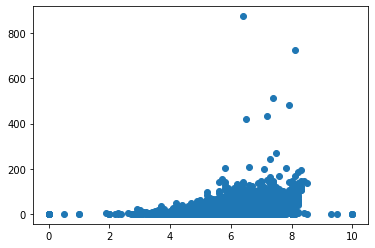

In [31]:
plt.scatter(df["vote_average"], df["popularity"])

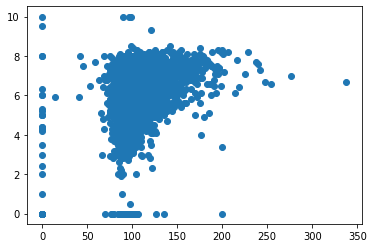

In [32]:
plt.scatter(df["runtime"],df["vote_average"])

In [33]:
df["budget"] = df_movies["budget"]

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df["profit_ratio"] = df_movies["revenue"] / df_movies["budget"] -1

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df.columns.values

array(['id', 'title', 'popularity', 'vote_average', 'vote_count',
       'runtime', 'release_date', 'genres', 'keywords', 'director',
       'producer', 'screenplay', 'writer', 'budget', 'profit_ratio'],
      dtype=object)

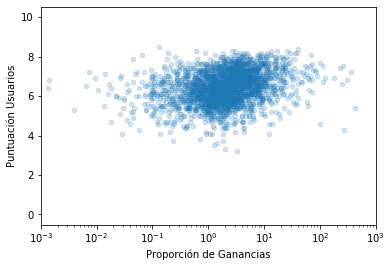

In [67]:
plt.scatter( df["profit_ratio"], df["vote_average"],  alpha=0.2, s=20)
plt.xlabel("Proporción de Ganancias")
plt.ylabel("Puntuación Usuarios")
plt.xlim(0.001,1000)
plt.xscale("log")

(1, 1000000000)

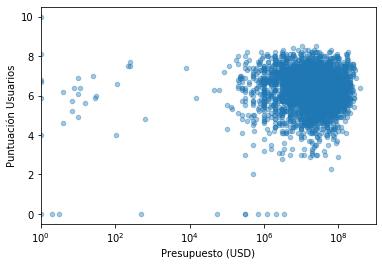

In [40]:
plt.scatter( df["budget"], df["vote_average"],  alpha=0.4, s=20)
plt.xlabel("Presupuesto (USD)")
plt.ylabel("Puntuación Usuarios")
plt.xscale("log")
plt.xlim(10**0, 10**9)

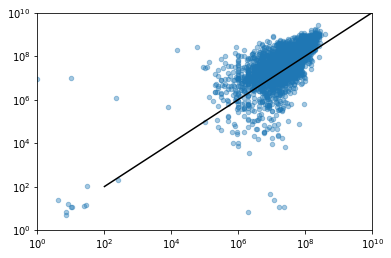

In [57]:
plt.scatter(df["budget"], (1+df["profit_ratio"])*df["budget"], alpha=0.4, s=20)

plt.xscale("log")
plt.yscale("log")
plt.xlim(10**0,10**10)
plt.ylim(10**0,10**10)

x=np.logspace(2,10)

plt.plot(x,x, c="k")

In [48]:
sum((df.budget ==0))

971

In [49]:
sum(df.profit_ratio >= 20)

250

In [55]:
print(df.vote_average[df.profit_ratio >=20])

321     5.6
359     5.8
409     7.3
475     6.7
489     7.3
       ... 
4670    6.6
4671    6.8
4672    7.6
4677    6.3
4696    7.4
Name: vote_average, Length: 250, dtype: float64


In [68]:
import pickle

In [70]:
filename = "tmdb4700.pkl"
outfile = open(filename, "wb")

In [71]:
pickle.dump(df, outfile)

In [72]:
outfile.close()